In [1]:
import pandas as pd
import numpy as np

import sys
from GA_function import *
from typing import Iterable
import datetime
import pickle
import random

import quantstats as qs
import matplotlib.pyplot as plt

target_folder_path = '/Users/tedting/Documents/backtest_ted/DM/data_DM'

### 共通資料
adj_open = pd.read_pickle(rf"/Users/tedting/Documents/backtest_ted/OFFICIAL_data_2/adj_open.pkl").loc['2013':]
exp_returns = adj_open.pct_change().shift(-2)

Close = pd.read_pickle(rf'/Users/tedting/Documents/backtest_ted/OFFICIAL_data_2/close.pkl')
Volume = pd.read_pickle(rf'/Users/tedting/Documents/backtest_ted/OFFICIAL_data_2/volume.pkl')
Limit = pd.read_pickle(rf'/Users/tedting/Documents/backtest_ted/OFFICIAL_data_2/limit.pkl')

ZTXA = pd.read_pickle(rf'/Users/tedting/Documents/backtest_ted/OFFICIAL_data_2/ZTXA_close.pkl')
Benchmark = ZTXA['ZTXA 台指近月期貨指數'].pct_change().shift(-2)

# Combine Strategy
IncomeStatement_factor_ret = pd.read_pickle(rf'/Users/tedting/Documents/backtest_ted/OFFICIAL_data_2/財務報表因子.pkl')

### dataset資料
一以下 = pd.read_pickle(rf'{target_folder_path}/1 張以下(人數).pkl')
一到五 = pd.read_pickle(rf'{target_folder_path}/1 -5  張(人數).pkl')
五到十 = pd.read_pickle(rf'{target_folder_path}/5 -10 張(人數).pkl')
十到十五 = pd.read_pickle(rf'{target_folder_path}/10-15 張(人數).pkl')
十五到二十 = pd.read_pickle(rf'{target_folder_path}/15-20 張(人數).pkl')
二十到三十 = pd.read_pickle(rf'{target_folder_path}/20-30 張(人數).pkl')
三十到四十 = pd.read_pickle(rf'{target_folder_path}/30-40 張(人數).pkl')
四十到五十 = pd.read_pickle(rf'{target_folder_path}/40-50 張(人數).pkl')
五十到一百 = pd.read_pickle(rf'{target_folder_path}/50-100 張(人數).pkl')
一百到二百 = pd.read_pickle(rf'{target_folder_path}/100-200 張(人數).pkl')
二百到四百 = pd.read_pickle(rf'{target_folder_path}/200-400 張(人數).pkl')
四百到六百 = pd.read_pickle(rf'{target_folder_path}/400-600 張(人數).pkl')
六百到八百 = pd.read_pickle(rf'{target_folder_path}/600-800 張(人數).pkl')
八百到一千 = pd.read_pickle(rf'{target_folder_path}/800-1000張(人數).pkl')
一千以上 = pd.read_pickle(rf'{target_folder_path}/1000張以上  (人數).pkl')

empty = pd.DataFrame(0, index=一千以上.index, columns=一千以上.columns)

In [2]:
Volume_y_avg = Volume.rolling(252).mean()
Close_y_avg = Close.rolling(252).mean()
heavy_Filter = Close_y_avg < 1000 
Volume_Filter = Volume_y_avg > 200
trade_volume_Filter = Close_y_avg * Volume_y_avg > 60000
small_aum_Filter = Volume_Filter & trade_volume_Filter
small_aum_Filter2 = Volume_Filter & trade_volume_Filter & heavy_Filter # & Limit

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2022-01-03  2022-01-03
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          56.99%      -5.88%
CAGR﹪                     26.68%      -3.13%

Sharpe                     0.86        -0.1
Prob. Sharpe Ratio         87.61%      44.8%
Smart Sharpe               0.67        -0.07
Sortino                    1.21        -0.13
Smart Sortino              0.93        -0.1
Sortino/√2                 0.85        -0.09
Smart Sortino/√2           0.66        -0.07
Omega                      1.15        1.15

Max Drawdown               -26.57%     -31.48%
Longest DD Days            324         685
Volatility (ann.)          35.99%      17.77%
R^2                        0.0         0.0
Information Ratio          0.05        0.05
Calmar                     1.0      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-03-30,2022-06-30,2023-02-17,324,-26.572277,-24.879634
2,2023-07-28,2023-08-15,2023-11-23,118,-14.042160,-13.797006
3,2023-04-17,2023-05-10,2023-06-06,50,-14.031693,-13.948548
4,2022-01-17,2022-01-24,2022-02-08,22,-7.793595,-7.577409
5,2022-03-02,2022-03-07,2022-03-21,19,-7.118904,-6.909000


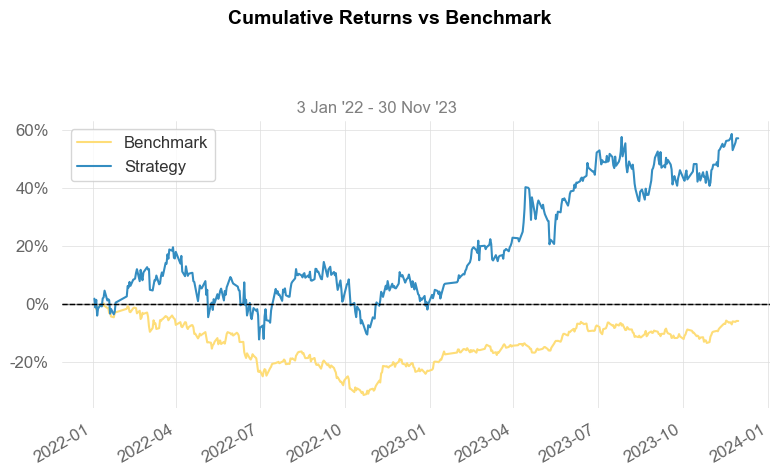

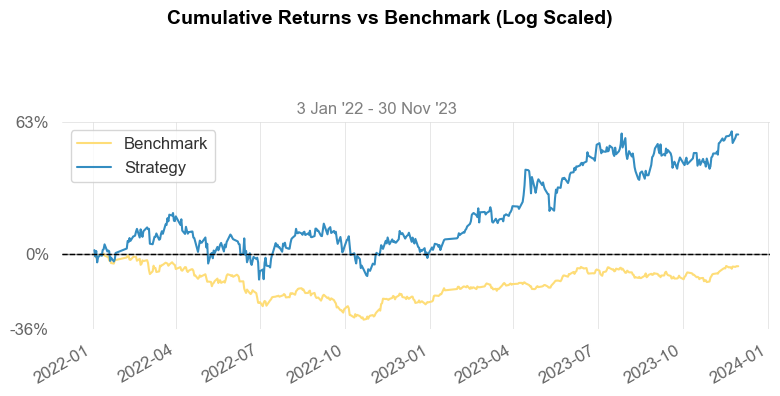

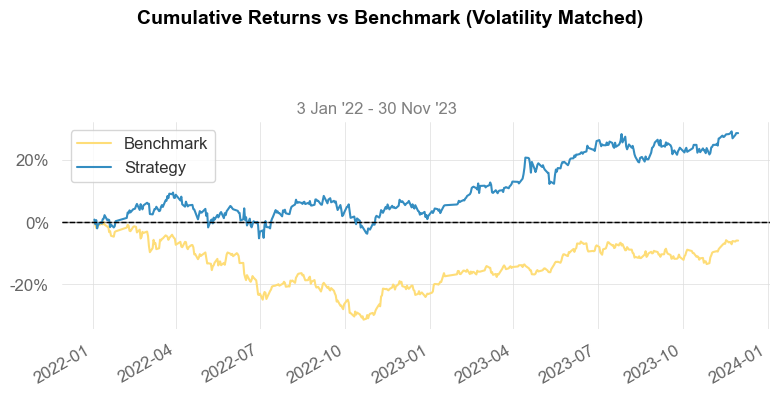

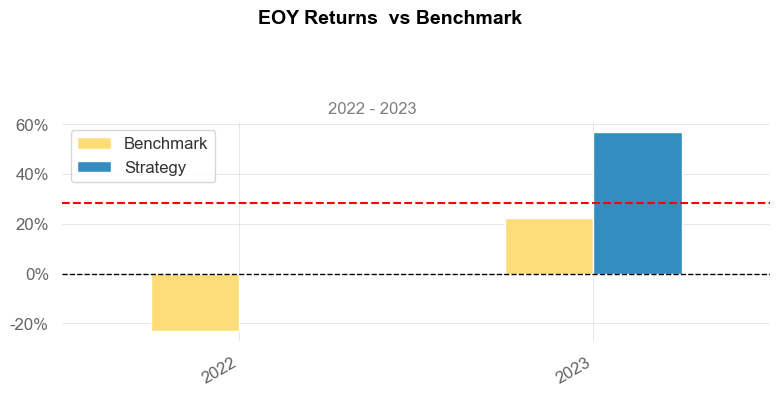

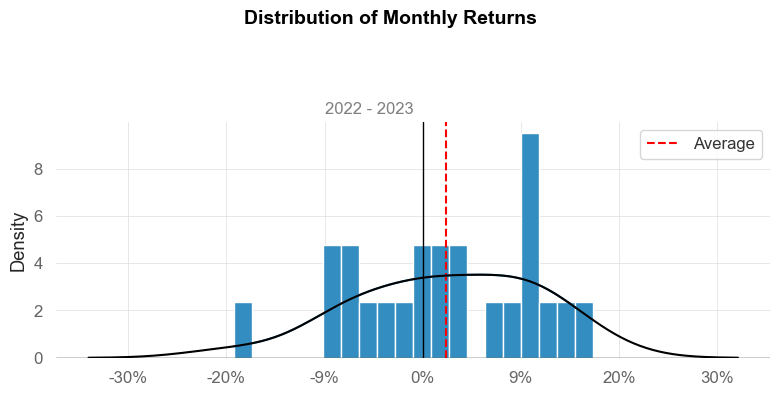

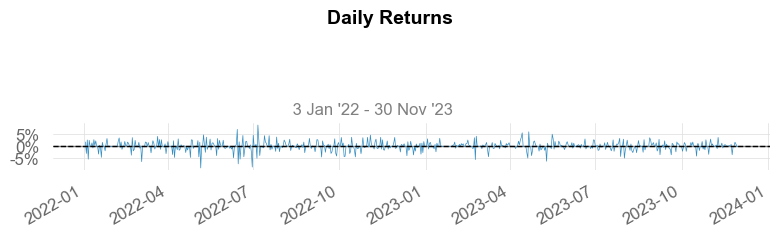

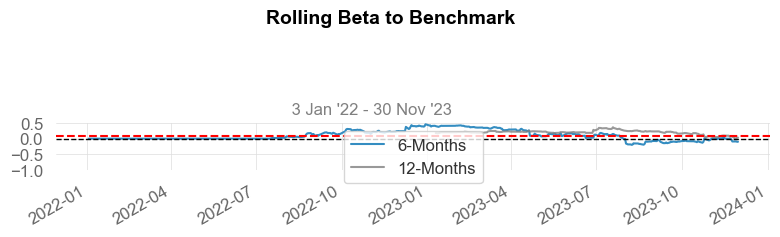

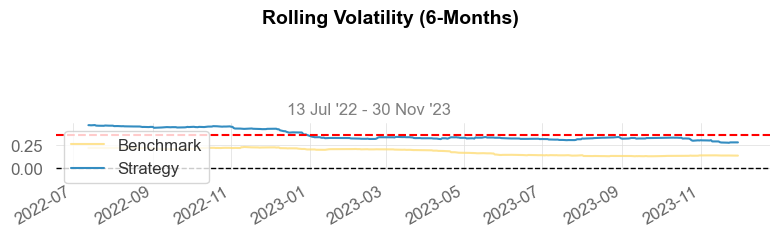

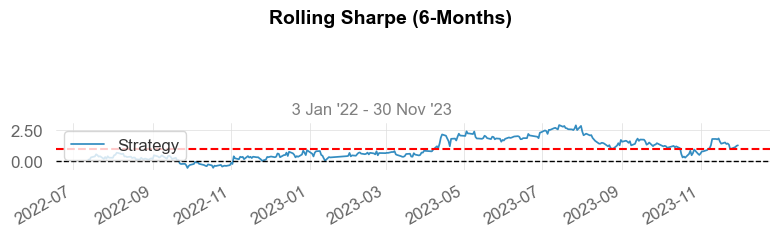

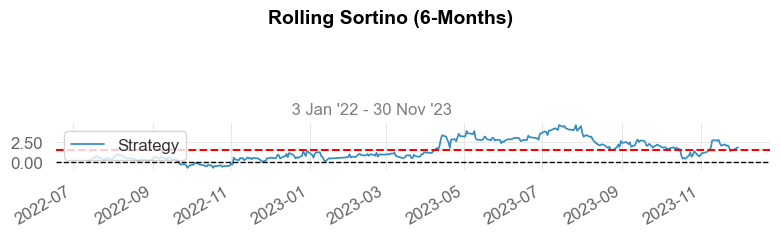

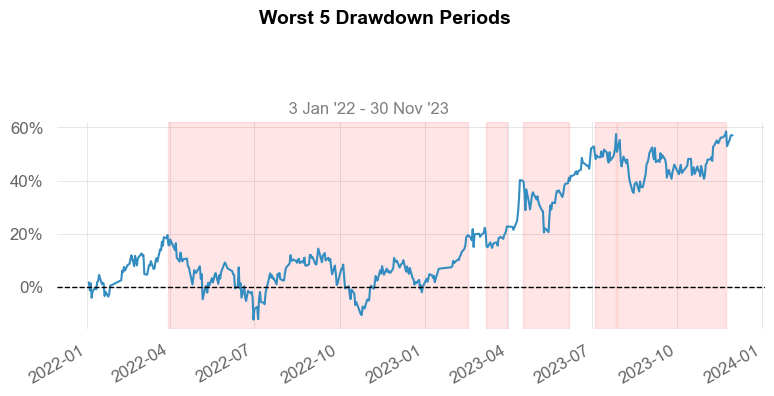

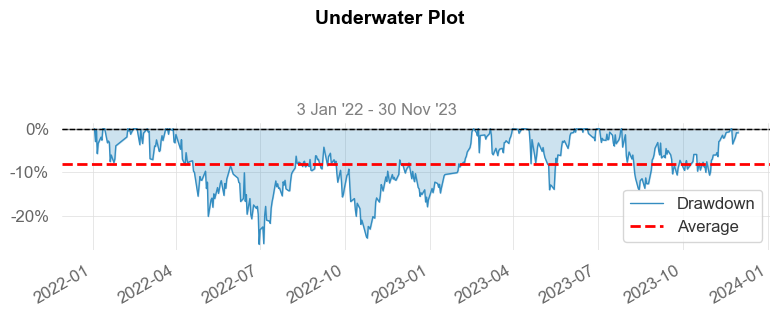

TypeError: pivot() takes 1 positional argument but 4 were given

In [5]:
correlation_matrix = pd.DataFrame()
expression_list = ['ts_min( ts_min( ts_min( ( 一千以上 * 一百到二百 + 一千以上 * 一千以上 * 二百到四百 / 四十到五十 * 一千以上 + 一千以上 - 三十到四十 ) ,252) ,252) ,252)']
start_time='2022-01-01' # '2013-01-01'
end_time='2023-11-30' # '2021-12-30'
for expression in expression_list:
    factor = eval(expression)
    daily_returns, result_summary = bt_fornow(factor, exp_returns,
                                strategy='LO',
                                filter='small_aum_Filter',
                                buy_fee=0.001425*0.3, sell_fee=0.001425*0.3+0.003,
                                start_time=start_time, 
                                end_time=end_time)
    correlation_matrix = pd.concat([correlation_matrix, daily_returns], axis=1, ignore_index = False)
    qs.reports.full(daily_returns-Benchmark.loc[start_time:end_time]+IncomeStatement_factor_ret.loc[start_time:end_time],Benchmark)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2022-01-03  2022-01-03
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          0.04%       -5.88%
CAGR﹪                     0.02%       -3.13%

Sharpe                     0.08        -0.1
Prob. Sharpe Ratio         54.35%      44.8%
Smart Sharpe               0.07        -0.09
Sortino                    0.11        -0.13
Smart Sortino              0.1         -0.12
Sortino/√2                 0.08        -0.09
Smart Sortino/√2           0.07        -0.08
Omega                      1.01        1.01

Max Drawdown               -28.44%     -31.48%
Longest DD Days            686         685
Volatility (ann.)          15.89%      17.77%
R^2                        0.28        0.28
Information Ratio          0.01        0.01
Calmar                     0.0    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-13,2022-10-18,2023-11-30,686,-28.439282,-26.965708
2,2022-01-04,2022-01-04,2022-01-07,3,-0.894862,-0.586775


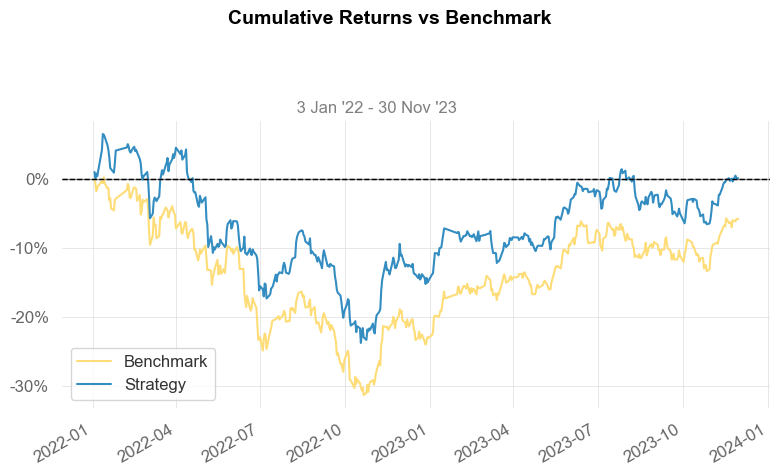

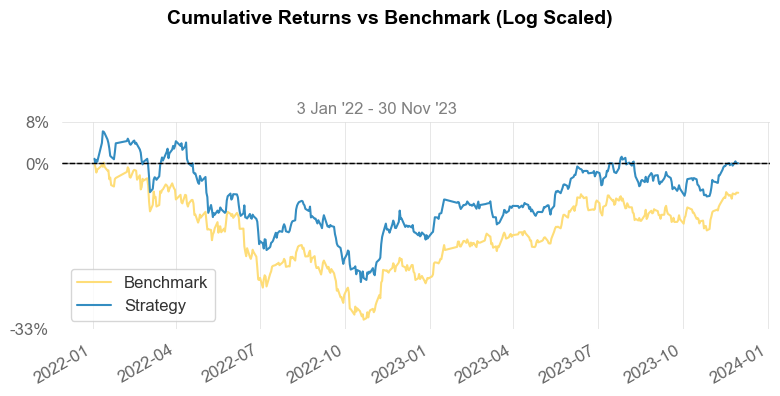

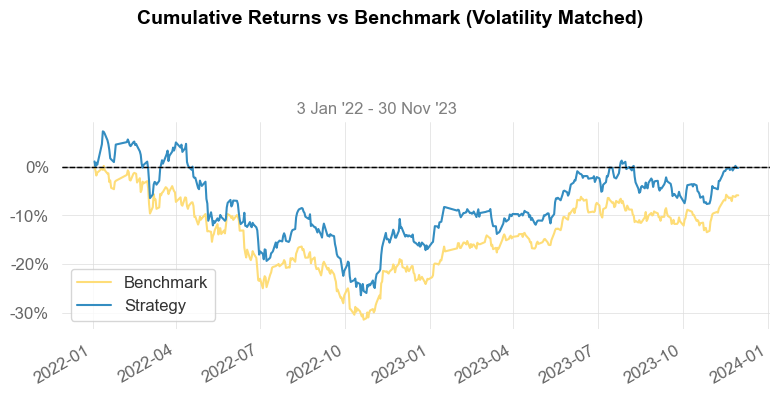

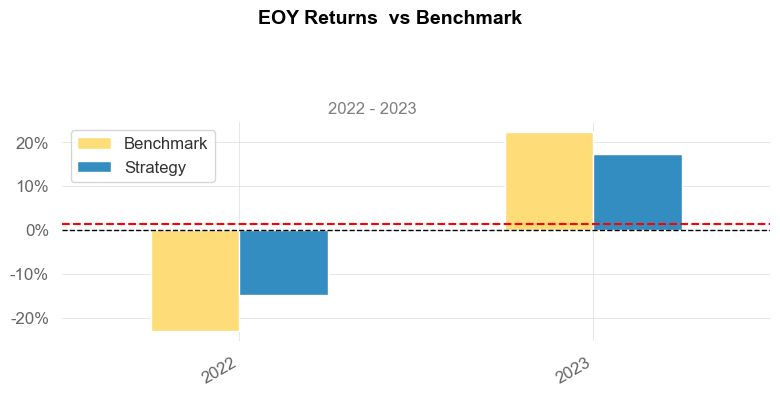

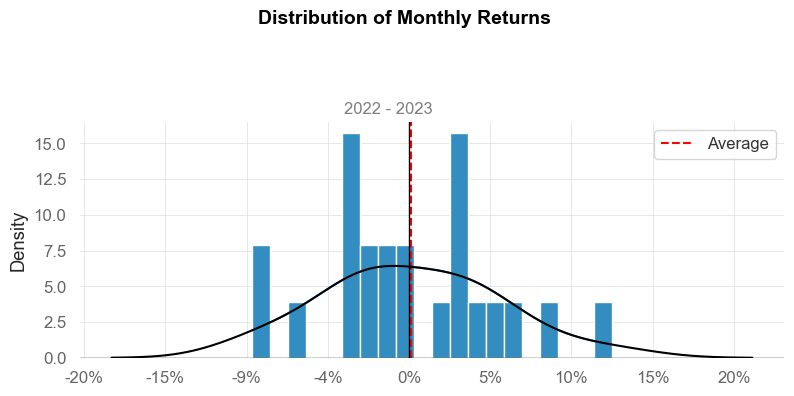

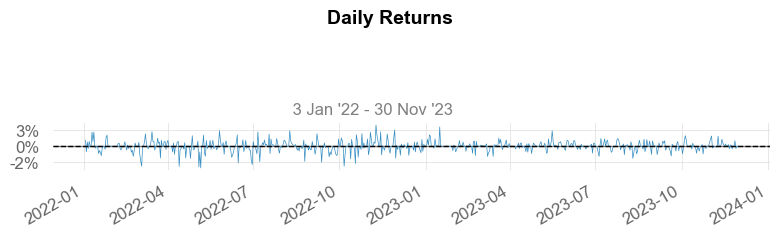

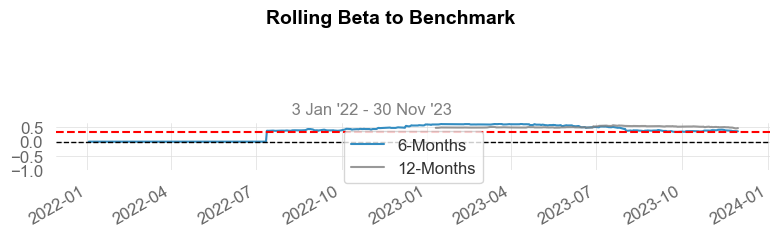

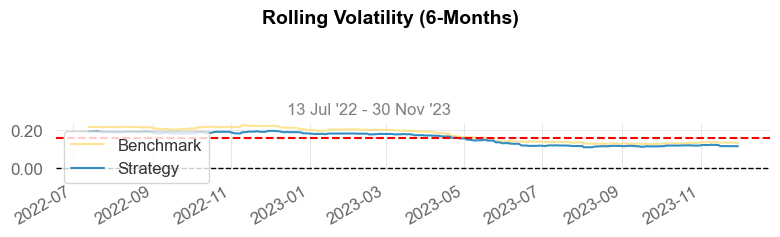

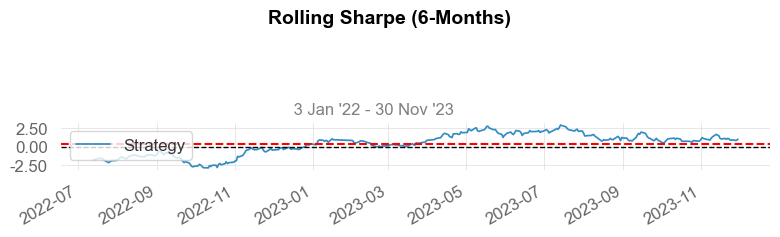

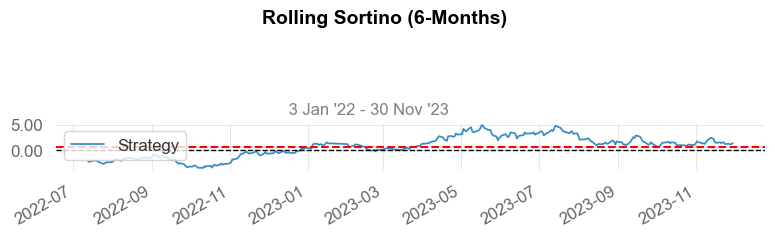

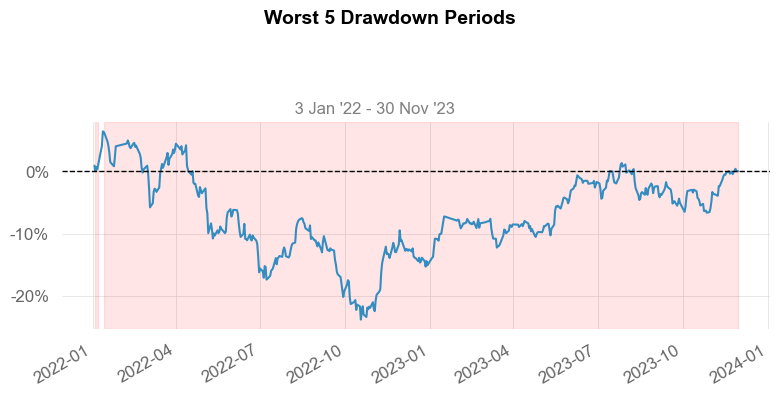

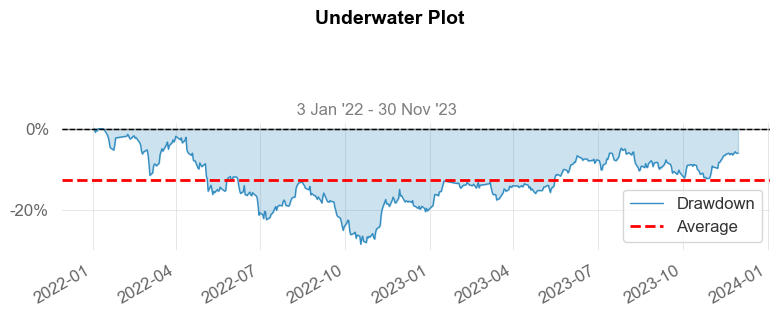

TypeError: pivot() takes 1 positional argument but 4 were given

In [13]:
correlation_matrix = pd.DataFrame()
expression_list = ['ts_sum( ts_min( ts_min( ( 二百到四百 * 一千以上 * 一千以上 * 一千以上 - empty - empty * 八百到一千 + 一千以上 / 一到五 ) ,252) ,252) ,252)']
start_time='2022-01-01' # '2013-01-01'
end_time='2023-11-30' # '2021-12-30'
for expression in expression_list:
    factor = eval(expression)
    daily_returns, result_summary = bt_fornow(factor, exp_returns,
                                strategy='LO',
                                filter='small_aum_Filter',
                                buy_fee=0.001425*0.3, sell_fee=0.001425*0.3+0.003,
                                start_time=start_time, 
                                end_time=end_time)
    correlation_matrix = pd.concat([correlation_matrix, daily_returns], axis=1, ignore_index = False)
    qs.reports.full(daily_returns,Benchmark)

In [15]:
correlation_matrix = pd.DataFrame()
expression_list = ['ts_min( ts_min( ts_min( ( 一千以上 * 一百到二百 + 一千以上 * 一千以上 * 二百到四百 / 四十到五十 * 一千以上 + 一千以上 - 三十到四十 ) ,252) ,252) ,252)',
                   'ts_sum( ts_min( ts_min( ( 二百到四百 * 一千以上 * 一千以上 * 一千以上 - empty - empty * 八百到一千 + 一千以上 / 一到五 ) ,252) ,252) ,252)',
            'ts_decay( ts_min( ts_sum( ( 四百到六百 * 一千以上 * 一千以上 + 二十到三十 / 二百到四百 - 六百到八百 - empty + 六百到八百 - 一千以上 ) ,252) ,252) ,252)',
            'ts_max( ts_max( ts_min( ( 四百到六百 + 一千以上 * 一千以上 * 一千以上 + 四百到六百 ) ,63) ,1) ,5)',
             'ts_max( ts_rank( ( 二十到三十 + empty + 一到五 - 二百到四百 )/( 八百到一千 - 五十到一百 - 十五到二十 - 一到五 ) ,252) ,126)',
             'ts_sum( ts_rank( ( 一到五 + 五到十 - 一以下 + 六百到八百 )/( 二十到三十 - 一以下 + 六百到八百 - 一以下 ) ,252) ,252)' ,
             'ts_max( ts_rank( ( 五十到一百 + 二百到四百 + 六百到八百 + 一百到二百 )/( 一千以上 - empty + 一到五 + 四十到五十 ) ,126) ,63)',
             'ts_max( ts_rank( ( 一百到二百 - 十到十五 + 五十到一百 - 五到十 )/( 一百到二百 + 三十到四十 + 五到十 + 四十到五十 ) ,252) ,21)',
             'ts_max( ts_rank( ( 十五到二十 - 五到十 - 五到十 + 二十到三十 )/( 五十到一百 - 一千以上 + 一百到二百 + 二百到四百 ) ,252) ,63)',
             'ts_sum( ts_rank( ( 一千以上 + 一千以上 - 五到十 - 十到十五 )/( 十五到二十 + 十五到二十 + 一以下 + 十到十五 ) ,126) ,126)']
start_time='2022-01-01' # '2013-01-01'
end_time='2023-11-30' # '2021-12-30'
for expression in expression_list:
    factor = eval(expression)
    daily_returns, result_summary = bt_fornow(factor, exp_returns,
                                strategy='LO',
                                filter='small_aum_Filter',
                                buy_fee=0.001425*0.3, sell_fee=0.001425*0.3+0.003,
                                start_time=start_time, 
                                end_time=end_time)
    correlation_matrix = pd.concat([correlation_matrix, daily_returns], axis=1, ignore_index = False)
    # qs.reports.full(daily_returns,Benchmark)

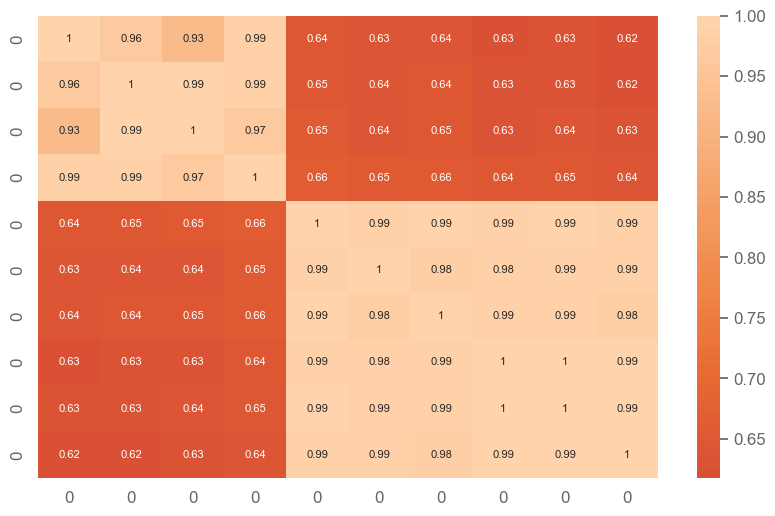

In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import seaborn as sns
df_corr = correlation_matrix.corr()
sns.heatmap(df_corr, center=0, annot=True, annot_kws={"size": 8})
mp.show()